<a href="https://colab.research.google.com/github/XZENG85/compuational_physics_N2014301020063/blob/master/%E2%80%9Cmodifiable_version%E2%80%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import make_circles
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_moons
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn import preprocessing
import numpy as np

In [0]:
###参数解释

class parameters:
    nn_input_dim = 2  # 输入层结点数 数据为二维图像 所以有两个输入节点，为X[0],X[1]
    nn_output_dim = 2  # 输出层结点数 y有两个分类0,1 所以也是两个节点
    # 梯度下降法参数 更新权重采用梯度下降发
    epsilon = 0.02  # 梯度下降学习速率  ##权重的学速率 可调整##题目四要求改进的地方
    reg_lambda = 0.02  # 正则化强度


In [0]:
 # 定义sigmoid 函数 （非线性）题目四要求从权重的学习速率、激活函数的改进（如换成tanh函数，ReLU函数等）、神经网络模型参数的初始化等方面改进
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x) 
    return 1/(1+np.exp(-x))
##tanh函数，
def nonlin1(x,deriv=False):
    s1 = np.exp(x) - np.exp(-x)
    s2 = np.exp(x) + np.exp(-x)
    tanh = s1 / s2
    if(deriv==True):
      s = 1 - tanh * tanh
      return s
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))
##ReLU函数  
def nonlin2(x):
    s = np.where(x < 0, 0, x)
    return s

##关于softmax，试一下最好，再用argmax取值之后就会发现下面的例子返回4.0应该
##import numpy as np
##z = np.array([1.0, 2.0, 3.0, 4.0, 1.0, 2.0, 3.0])
##print(np.exp(z)/sum(np.exp(z)))

In [0]:
 def generate_data(n):
  np.random.seed(0)
  X, y = datasets.make_moons(n_samples=n, noise=0.1)
  scaler = preprocessing.StandardScaler()
  X=scaler.fit_transform(X)  #事实上好像没有也没有出错
  return X, y


 def generate_data1(n):
  np.random.seed(0)
  X,y = make_circles(n_samples=n, factor=.4, noise=.1)
  return X, y

 def generate_data2(n):
  np.random.seed(0)
  X, y = make_blobs(n_samples=n, centers = [[-2, -2], [2, 2]])
  return X, y

 def generate_data3(n):
  X = np.random.rand(n, 2) - 0.5   ##其中n=100
  y = (X[:, 0] * X[:, 1] < 0) + 0
  return X, y

##定义函数 但是没有像老师那样子定义。老师加上了
##scaler = preprocessing.StandardScaler()
##X=scaler.fit_transform(X)
##但是似乎没有标准化也没有关系。。。可以加上我觉得不碍事，我就在第一条加上了,其他没有加
##scaler = preprocessing.StandardScaler().fit(X)
##scaler.transform(X)     标准化看https://blog.csdn.net/u013402321/article/details/79043402 但是我自己尝试即使没有transform也是能画出这个图


In [0]:
# - nn_hdim: 隐藏层结点数
# - nn_hdim1: 隐藏层结点数，第一层隐藏阶段数目，题目要求4
# - nn_hdim1: 隐藏层结点数，第一层隐藏阶段数目，题目要求4 #但是在后期调用build_model的时候可以改
# - num_passes: 通过梯度下降的训练数目 ##迭代次数 题目三损失记录 可改
## 权重更新
def build_model(X, y, nn_hdim1,nn_hdim2, num_passes=20000):  ##这里可以设置nn_hdim1,nn_hdim2,调用的时候写build_model(X,y,4,4)
    # 初始化 
    num_examples = len(X)   ##数据的长度 在generate的时候大多数设置了100
    np.random.seed(0)  ##产生随机数
    ##有6个权重要随机产生 题目四要求调试的时候改变初始化权重的值。可以改这里
    ##六个权重W1,b1,W2,b2,W3,b3
    ##输入层->第一层隐藏节点参数
    W1 = np.random.randn(parameters.nn_input_dim, nn_hdim1) / np.sqrt(parameters.nn_input_dim)  ##调用parameter的定义，所以要parameters.nn_input_dim。输入节点数为2
    b1 = np.zeros((1, nn_hdim1))
    ##第一层隐藏节点->第二层隐藏节点
    W2 = np.random.randn(nn_hdim1,nn_hdim2) / np.sqrt(nn_hdim1)  ##调用parameter的定义，所以要parameters.nn_input_dim。输入节点数为2
    b2 = np.zeros((1, nn_hdim2))
    ##第二层隐藏节点->输出层
    W3 = np.random.randn(nn_hdim2, parameters.nn_output_dim) / np.sqrt(nn_hdim2)
    b3 = np.zeros((1, parameters.nn_output_dim))

    model = {}

    #梯度下降 有迭代次数
    for i in range(0, num_passes):

        # 前向传播
        z1 = X.dot(W1) + b1
        a1 = nonlin(z1)
        z2 = a1.dot(W2) + b2
        a2 = nonlin1(z2)
        z3 = a2.dot(W3) + b3
        exp_scores = np.exp(z3)##softmax函数
        ##softmax是多元回归，所以优于sigmoid函数
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) 
        
        ##probs是最终的分类预测的值！！
        ##或者用
        #probs = nonlin(z3)## 但是网上说没有这么好哦

        # 反向传播
        delta4 = probs
        delta4[range(num_examples), y] -= 1
        dW3 = (a2.T).dot(delta4)
        db3 = np.sum(delta4, axis=0, keepdims=True)
        delta3 = delta4.dot(W3.T) * nonlin1(a2,deriv=True)
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0)
        delta2 = delta3.dot(W2.T) * nonlin(a1,deriv=True)
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        dW3 += parameters.reg_lambda * W3
        dW2 += parameters.reg_lambda * W2
        dW1 += parameters.reg_lambda * W1
##explaination        
###delta4[range(num_example), y] is selecting lines of the matrix delta3 ranging from 0 to num_examples but only selecting column y.
        
  # 更新梯度下降参数
        W1 += -parameters.epsilon * dW1
        b1 += -parameters.epsilon * db1
        W2 += -parameters.epsilon * dW2
        b2 += -parameters.epsilon * db2
        W3 += -parameters.epsilon * dW3
        b3 += -parameters.epsilon * db3

        # 更新
        model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2,'W3': W3, 'b3': b3}        
    return model


In [0]:
def plot_scatter(X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()

def plot_decision_boundary(pred_func, X, y):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # 格点间距h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # 预测值
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # 画分割线
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    #scaler = preprocessing.StandardScaler()
#X=scaler.fit_transform(X)
##scaler = preprocessing.StandardScaler().fit(X)
##scaler.transform(X)     标准化看https://blog.csdn.net/u013402321/article/details/79043402 但是我自己尝试即使没有transform也是能画出这个图
##df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))   ##数据集的第一列是x值，第二列是y值，label是y
    plt.show()



In [0]:
def visualize(X, y, model):
    plot_scatter(X, y)##visualize the 
    plot_decision_boundary(lambda x:predict(model,x), X, y)
    

In [0]:
##对数损失, 即对数似然损失(Log-likelihood Loss), 
##也称逻辑斯谛回归损失(Logistic Loss)或交叉熵损失(cross-entropy Loss), 
##是在概率估计上定义的.它常用于(multi-nominal, 多项)逻辑斯谛回归和神经网络
##以及一些期望极大算法的变体. 可用于评估分类器的概率输出.
##形式为
##−y∗log(p)−(1−y)∗log(1−p)
#对于二分类问题，y取值为0或1，p为预测结果为y的概率，log为自然对数
#https://blog.algorithmia.com/introduction-to-loss-functions/
##Log Loss is a loss function also used frequently in classification problems, 
##and is one of the most popular measures for Kaggle competitions.
##It’s just a straightforward modification of the likelihood function with logarithms.


In [0]:
 def calculate_loss(model, X, y):      ##模型的损失
    num_examples = len(X)  # 训练集大小
    W1, b1, W2, b2, W3, b3= model['W1'], model['b1'], model['W2'], model['b2'],model['W3'], model['b3']
    # 前向传播  ##参数更新后的预测
    z1 = X.dot(W1) + b1
    a1 = nonlin(z1)
    z2 = a1.dot(W2) + b2
    a2 = nonlin1(z2)
    z3 = a2.dot(W3) + b3
    exp_scores = np.exp(z3)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)  

    ##probs = nonlin(z3)
    # 计算误差 ##计算交叉熵
    ##arr[[0, 2], [3, 1]] 的含义是：选择第一行和第三行，然后对第一行选择第四列，对第三行选择第二列。
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # Add regularization term to loss (optional)
    data_loss += parameters.reg_lambda / 2 * (np.sum(np.square(W1)) + np.sum(np.square(W2))+ np.sum(np.square(W3)))
    final_loss=1. / num_examples * data_loss
    ##print(final_loss)
    return final_loss
##
  ##def plotloss()
    

def predict(model, x):
    W1, b1, W2, b2, W3, b3= model['W1'], model['b1'], model['W2'], model['b2'],model['W3'], model['b3']
    # 前向传播
    z1 = x.dot(W1) + b1
    a1 = nonlin(z1)
    z2 = a1.dot(W2) + b2
    a2 = nonlin1(z2)
    z3 = a2.dot(W3) + b3
    exp_scores = np.exp(z3)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    ##probs = nonlin(z3)
    #print(np.argmax(probs, axis=1))
    return np.argmax(probs, axis=1)  ##返回占比（或者说值）最大的那个


def correct_rate(model, X, y):      ##模型的正确率
    num_examples = len(X)  # 训练集大小
    W1, b1, W2, b2, W3, b3= model['W1'], model['b1'], model['W2'], model['b2'],model['W3'], model['b3']
    # 前向传播  ##参数更新后的预测
    z1 = X.dot(W1) + b1
    a1 = nonlin(z1)
    z2 = a1.dot(W2) + b2
    a2 = nonlin1(z2)
    z3 = a2.dot(W3) + b3
    exp_scores = np.exp(z3)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)  
    a=np.argmax(probs, axis=1)  ##返回占比（或者说值）最大的那个 
  #  print(a)
 #   print(y)
    b=np.sum(abs(np.argmax(probs, axis=1)-y))
   # print(b)
    #print(1-b/num_examples)
    return 1-b/num_examples

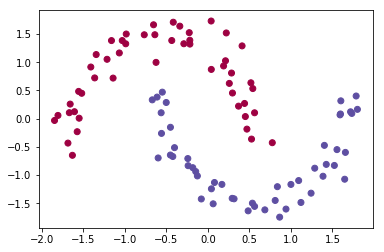

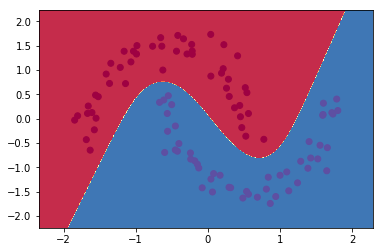

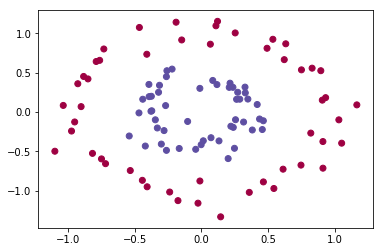

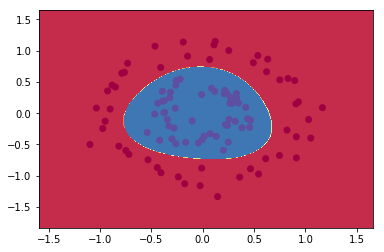

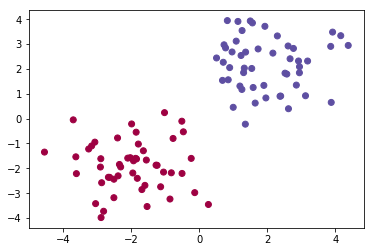

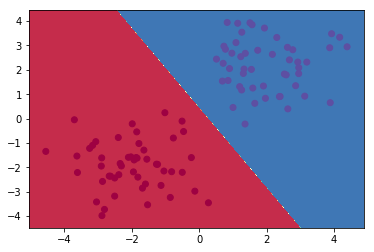

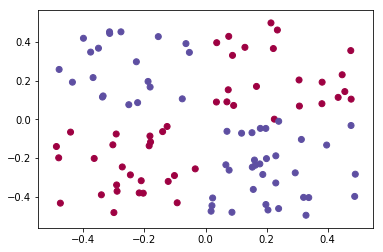

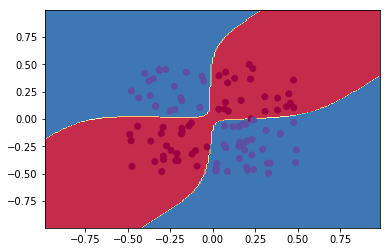

In [0]:
def main():
    X, y = generate_data(100)
    model = build_model(X, y, 4,4)
    visualize(X, y, model)
    correct_rate(model, X, y)
    
    X, y = generate_data1(100)
    model = build_model(X, y, 4,4)
    visualize(X, y, model)
    correct_rate(model, X, y)

    X, y = generate_data2(100)
    model = build_model(X, y, 4,4)
    visualize(X, y, model)
    correct_rate(model, X, y)
    
    X, y = generate_data3(100)
    model = build_model(X, y, 4,4)
    visualize(X, y, model)
    correct_rate(model, X, y)
main()

In [0]:
def test():
    X, y = generate_data(100)
    for n in range(10,1000,30):
      model = build_model(X, y, 4,4,num_passes=n)
      calculate_loss(model, X, y)
      final_loss=calculate_loss(model, X, y)
      correct_rate(model, X, y)
      c_rate=correct_rate(model, X, y)
      plt.subplot(121)
      plt.scatter(n,final_loss)
      plt.subplot(122)
      plt.scatter(n,c_rate)
def test1():    
    X, y = generate_data1(100)
    for n in range(10,1000,30):
      model = build_model(X, y, 4,4,num_passes=n)
      calculate_loss(model, X, y)
      final_loss=calculate_loss(model, X, y)
      correct_rate(model, X, y)
      c_rate=correct_rate(model, X, y)
      plt.subplot(121)
      plt.scatter(n,final_loss)
      plt.subplot(122)
      plt.scatter(n,c_rate)
def test2():     
    X, y = generate_data2(100)
    for n in range(10,1000,30):
      model = build_model(X, y, 4,4,num_passes=n)
      calculate_loss(model, X, y)
      final_loss=calculate_loss(model, X, y)
      correct_rate(model, X, y)
      c_rate=correct_rate(model, X, y)
      plt.subplot(121)
      plt.scatter(n,final_loss)
      plt.subplot(122)
      plt.scatter(n,c_rate)
def test3():      
    X, y = generate_data3(100)
    for n in range(10,1000,30):
      model = build_model(X, y, 4,4,num_passes=n)
      calculate_loss(model, X, y)
      final_loss=calculate_loss(model, X, y)
      correct_rate(model, X, y)
      c_rate=correct_rate(model, X, y)
      plt.subplot(121)
      plt.scatter(n,final_loss)
      plt.subplot(122)
      plt.scatter(n,c_rate) 
      

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


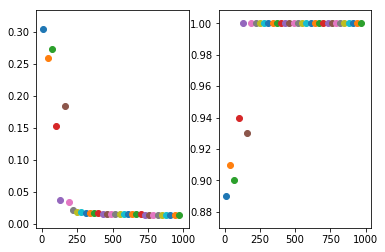

In [0]:
test()

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


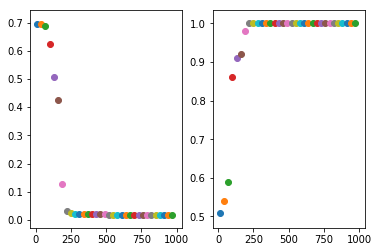

In [0]:
test1()

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


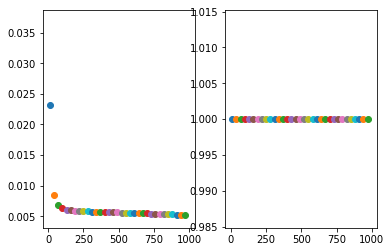

In [0]:
test2()

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


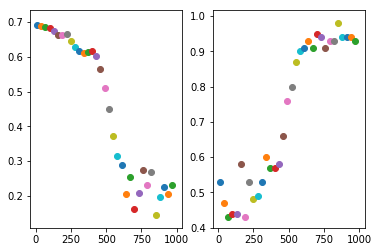

In [0]:
test3()